# Multi-Agent Conversation and Stand-up Comedy

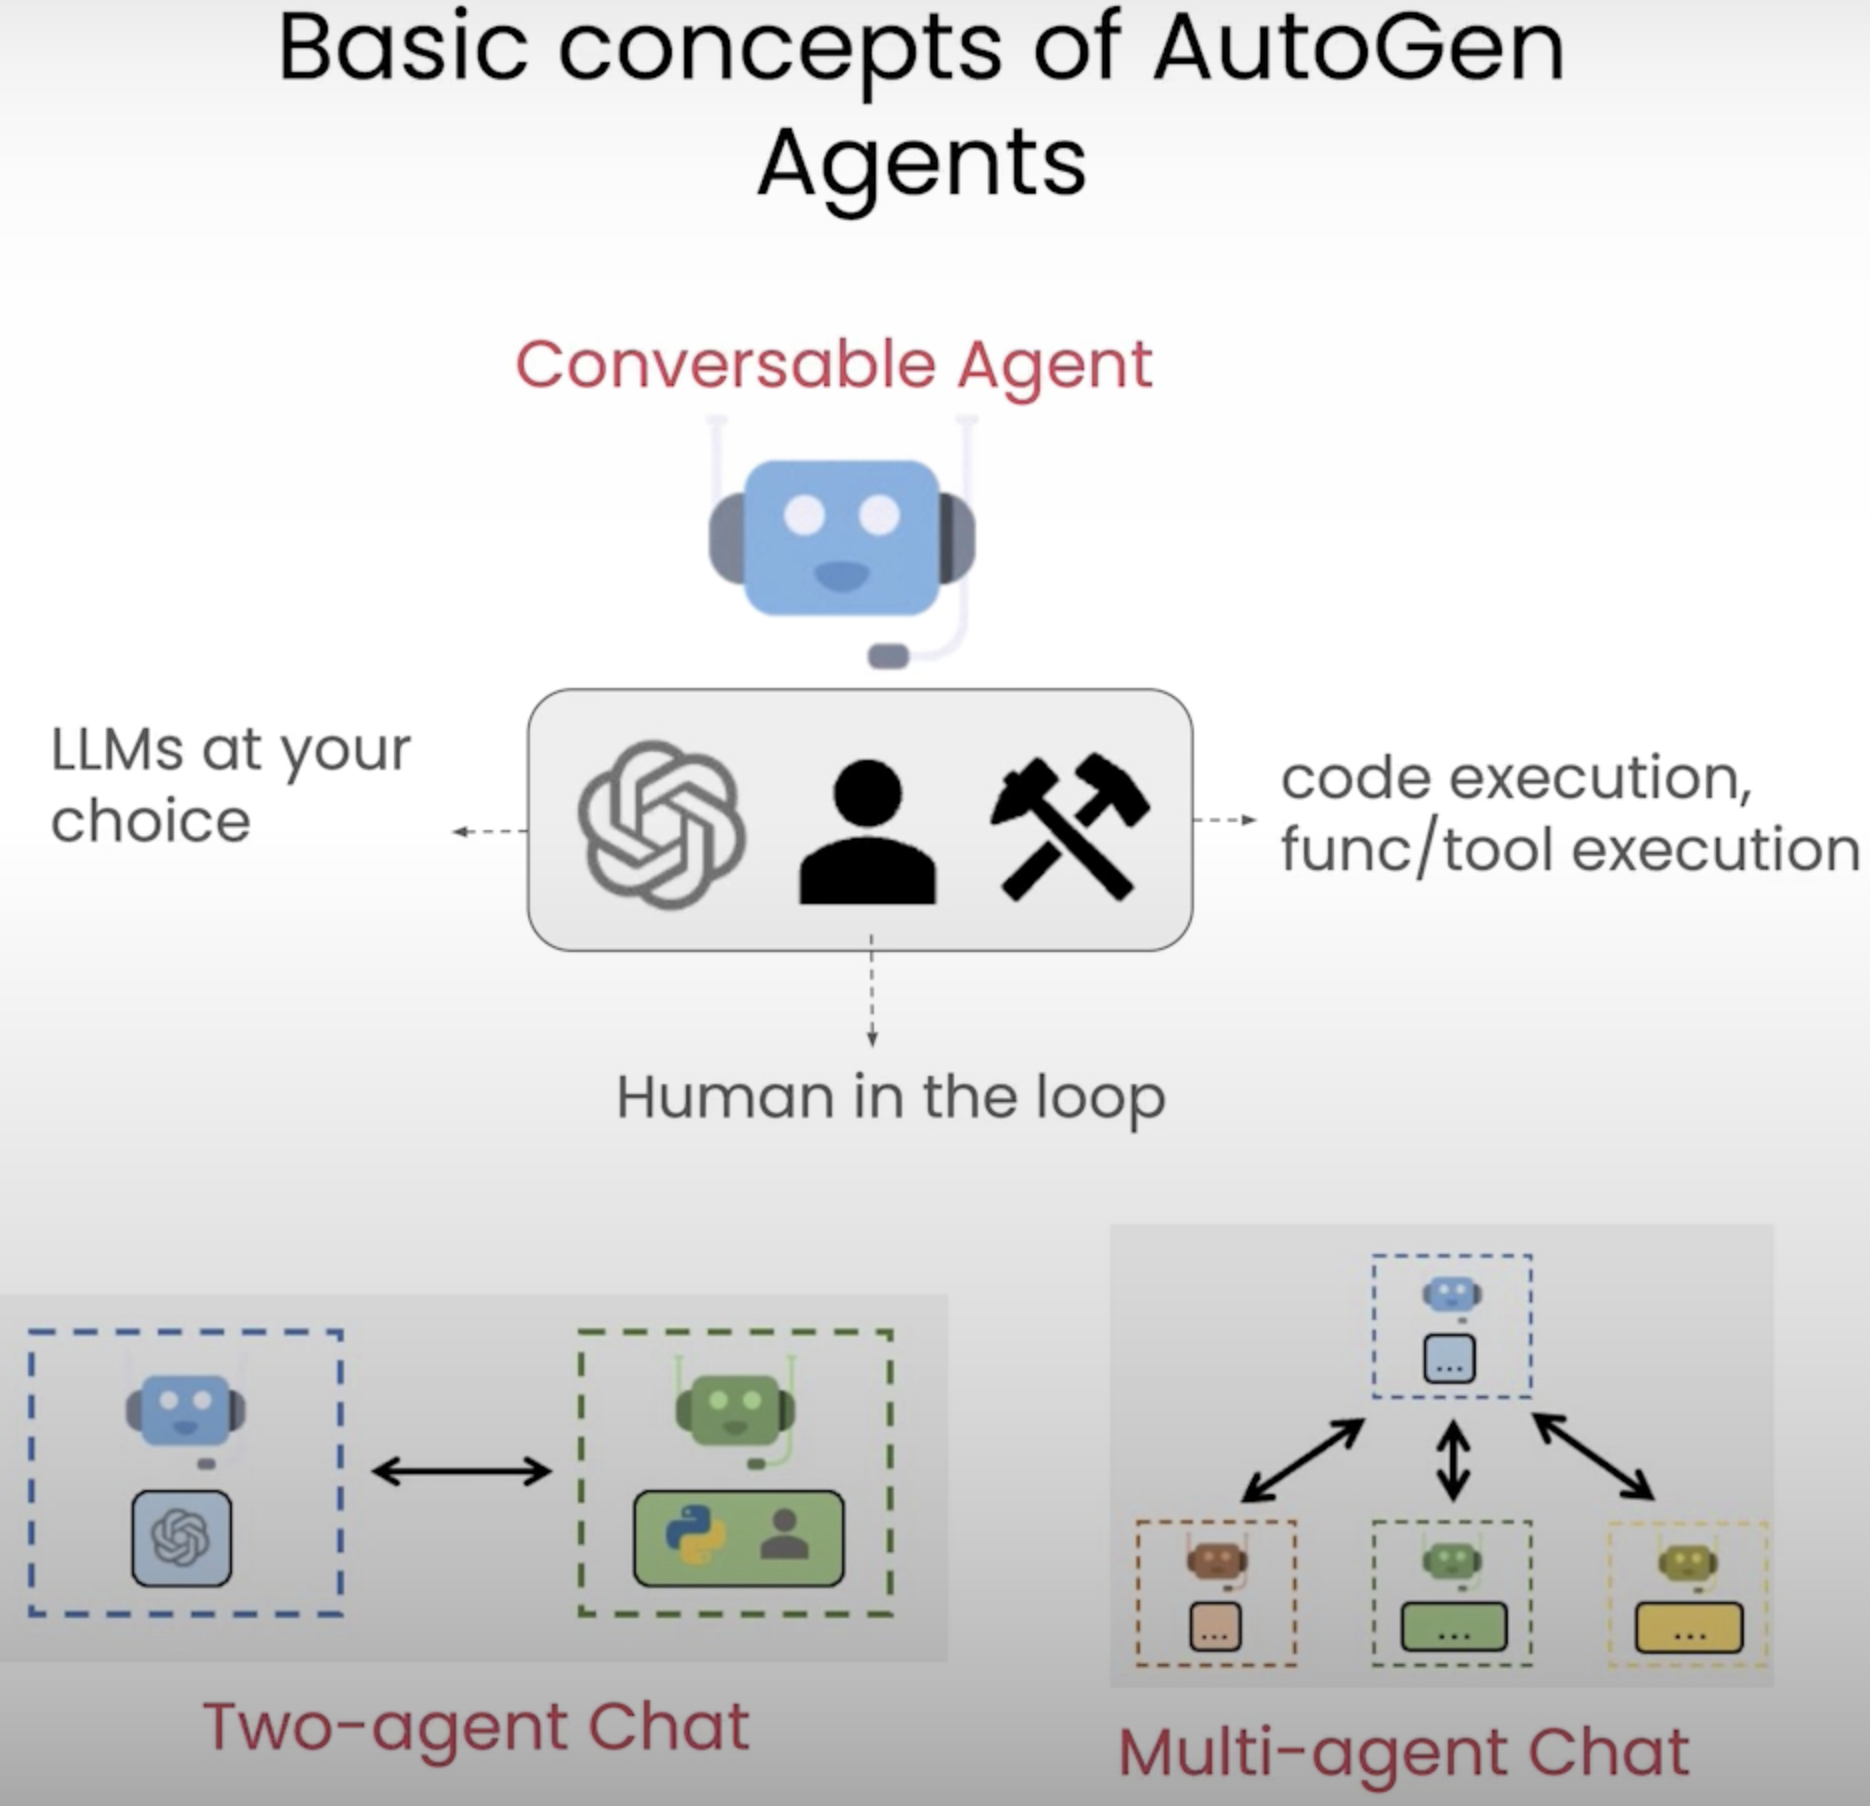

### Autogen 
- Agent is an entity that can act on behalf of human intent, send messages, receive messages, perform actions, generate replies and interact with other agents. 
- AutoGen has built-in agent class called "conversable agent" it unifies diff types of agents in the same programming abstraction. It comes with lot of build in functionalities. 
- One capability that it can keep human in the loop and checking for stopping the response.

## Setup

In [1]:
from utils import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()
llm_config = {"model": "gpt-3.5-turbo"}

## Define an AutoGen agent

In [4]:
from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER", # it will not take human feedback
    # can switch to ALWAYS, then it will ask for human input 
)

In [5]:
reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

Sure! Here's one for you:

Why don't scientists trust atoms?

Because they make up everything!


In [6]:
# it doesnt alter the internal state of the agent; so if we call it again
# it doesnt know it already generated a reply before.
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)
print(reply)

Of course! Please provide me with the joke you would like me to repeat.


## Conversation

Setting up a conversation between two agents, Cathy and Joe, where the memory of their interactions is retained.

In [7]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

In [8]:
chat_result = joe.initiate_chat( # Joe will start the convo
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe, let's do this! So, I've been trying to eat healthier lately. You know, watching my portions and all that. But then I realized... "portion control" just means I have to fit four slices of pizza onto one plate instead of two. 

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's true! And now I have an excuse to eat twice as much pizza.

--------------------------------------------------------------------------------
cathy (to joe):

Exactly! Double the pizza, double the fun, right? I feel like I should start a support group for people who can't resist the allure of a good slice. We'll call it "Pizzaholics Anonymous." The first step is admitting you have a problem... but the second step is ordering another pie.

--------------------------------------------------

## Print some results

You can print out:

1. Chat history
2. Cost
3. Summary of the conversation

In [9]:
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': "I'm Joe. Cathy, let's keep the jokes rolling.",
  'role': 'assistant'},
 {'content': "Hey Joe, let's do this! So, I've been trying to eat healthier "
             'lately. You know, watching my portions and all that. But then I '
             'realized... "portion control" just means I have to fit four '
             'slices of pizza onto one plate instead of two. ',
  'role': 'user'},
 {'content': "Haha, that's true! And now I have an excuse to eat twice as much "
             'pizza.',
  'role': 'assistant'},
 {'content': 'Exactly! Double the pizza, double the fun, right? I feel like I '
             "should start a support group for people who can't resist the "
             'allure of a good slice. We\'ll call it "Pizzaholics Anonymous." '
             'The first step is admitting you have a problem... but the second '
             'step is ordering another pie.',
  'role': 'user'}]


In [10]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 140,
                                                             'cost': 0.0003425,
                                                             'prompt_tokens': 265,
                                                             'total_tokens': 405},
                                      'total_cost': 0.0003425},
 'usage_including_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 140,
                                                             'cost': 0.0003425,
                                                             'prompt_tokens': 265,
                                                             'total_tokens': 405},
                                      'total_cost': 0.0003425}}


In [11]:
pprint.pprint(chat_result.summary)

('Exactly! Double the pizza, double the fun, right? I feel like I should start '
 "a support group for people who can't resist the allure of a good slice. "
 'We\'ll call it "Pizzaholics Anonymous." The first step is admitting you have '
 'a problem... but the second step is ordering another pie.')


## Get a better summary of the conversation

In [12]:
chat_result = joe.initiate_chat(
    cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.", 
    max_turns=2, 
    summary_method="reflection_with_llm",
    summary_prompt="Summarize the conversation",
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe, let's do this! So, I've been trying to eat healthier lately. You know, watching my portions and all that. But then I realized... "portion control" just means I have to fit four slices of pizza onto one plate instead of two. 

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's true! And now I have an excuse to eat twice as much pizza.

--------------------------------------------------------------------------------
cathy (to joe):

Exactly! Double the pizza, double the fun, right? I feel like I should start a support group for people who can't resist the allure of a good slice. We'll call it "Pizzaholics Anonymous." The first step is admitting you have a problem... but the second step is ordering another pie.

--------------------------------------------------

In [13]:
pprint.pprint(chat_result.summary)

('The friends enjoy joking about their love for pizza and humorously discuss '
 'eating more pizza as a solution to portion control.')


## Chat Termination

if max_turn is not sure then Chat can be terminated using a termination conditions.

In [14]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"] or "Goodbye" in msg["content"],
)

In [ ]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey, Joe! Ready to laugh? Why did the math book look sad? Because it had too many problems!

--------------------------------------------------------------------------------


In [ ]:
cathy.send(message="What's last joke we talked about?", recipient=joe)